In [1]:
import No_ML as nml
import ML_method as mlm
import Model_Test as mt
import matplotlib.pyplot as plt
import numpy as np
from  matplotlib.colors import LogNorm
from sklearn.svm import SVC

In [2]:
X=np.genfromtxt(r"X-refined.csv", delimiter=",", dtype=float)
y=np.genfromtxt(r"y-refined.csv", delimiter=",", dtype=float)
X=X.reshape((len(X)//120,120))
y=y.reshape((len(y)//2,2))
y1=y[:,0]*(y[:,1]>2)

# I. C and γ parameters

In [194]:
Cvalues=[1e5, 1e6, 1e7, 1e8, 1e9]
GAMMAvalues=[0.1, 1, 10, 100]

In [ ]:
biases=[]
variances=[]
for Cvalue in Cvalues:
    svm = SVC(C = Cvalue, gamma=0.1, kernel='rbf', probability=True)
    bias, variance = mt.calculate_bias_variance(svm, X, y1, k=5)
    variances.append(variance)
    biases.append(bias)

In [202]:
'''Cvalues=[10**i for i in range(-1,10)]
biases = [0.0037099652253946005,
 0.0016499396064538255,
 0.0007486471044970539,
 0.0006459698749002083,
 0.0004554135448802565,
 0.00030850594975759813,
 0.0002056706331717617,
 0.00036726898780663485,
 0.00030850594975759813,
 0.00036726898780667925,
 0.0003378874687821387]
variances=[0.01239999999999995,
 0.0048000000000000395,
 0.0028000000000000112,
 0.0009766442735637173,
 0.0004551691305252294,
 0.0003083953428198908,
 0.00028637673879771314,
 0.0003671227708304751,
 0.00030840613374064313,
 0.00036712924538292644,
 0.000337761754555371]
'''

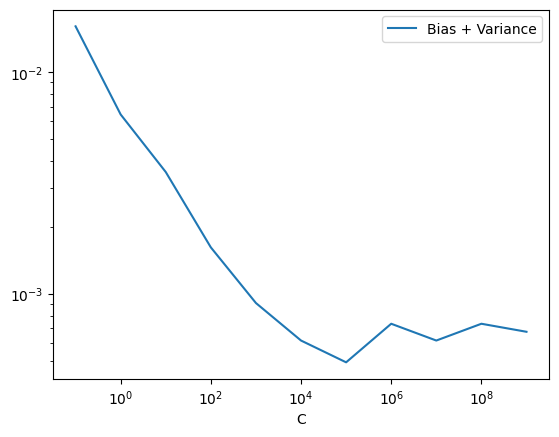

In [206]:
plt.plot(Cvalues, np.array(biases)+np.array(variances), label='Bias + Variance')
plt.xlabel('C')
plt.legend()
plt.xscale('log')
plt.yscale('log')

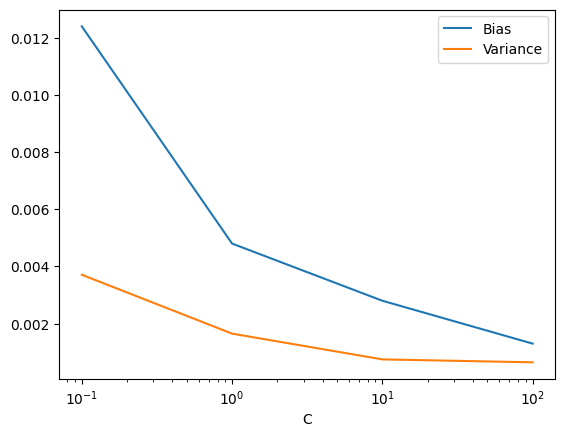

In [22]:
plt.plot(Cvalues, biases, label='Bias')
plt.plot(Cvalues, variances, label='Variance')
plt.xlabel('C')
plt.legend()
plt.xscale('log')

In [4]:
for Cvalue in Cvalues:
    for GAMMAvalue in GAMMAvalues:
        truepos=[[] for _ in range(5)]
        falsepos=[[] for _ in range(5)]
        newX, newY, svm = mlm.model(threshold=2, Xy=(X,y), chosen_kernel='rbf', chosen_C=Cvalue, chosen_gamma=GAMMAvalue)
        cv=mt.Cross_validate(svm, newX, newY, k=5)
        print('C = ', Cvalue)
        print('gamma = ', GAMMAvalue)
        print('accuracy = ', cv['accuracy'])
        for i in [0,2,3,4,5]:
            print ('class = ', i)
            print('precision = ', cv[i]['precision'])
            print('specificity = ', cv[i]['specificity'])
            print('sensitivity = ', cv[i]['sensitivity'])

C =  0.1
gamma =  0.1
accuracy =  0.987604812249362
class =  0
precision =  1.0
specificity =  1.0
sensitivity =  0.93802406124681
class =  2
precision =  0.9916847433116414
specificity =  0.9979037550127597
sensitivity =  1.0
class =  3
precision =  0.9866906474820144
specificity =  0.9966277798031352
sensitivity =  1.0
class =  4
precision =  0.9747690120824449
specificity =  0.9935289828654758
sensitivity =  1.0
class =  5
precision =  0.985981308411215
specificity =  0.9964454976303317
sensitivity =  1.0
C =  0.1
gamma =  1
accuracy =  0.9735326285089319
class =  0
precision =  1.0
specificity =  1.0
sensitivity =  0.944586219467736
class =  2
precision =  0.9970919665576155
specificity =  0.999270871308786
sensitivity =  1.0
class =  3
precision =  0.8999343832020997
specificity =  0.9722019686474663
sensitivity =  1.0
class =  4
precision =  0.9879076584829608
specificity =  0.9969923441487423
sensitivity =  0.982865475756471
class =  5
precision =  0.9934514637904468
specificity

# II. Choice of kernel

In [8]:
kernels=['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
    print('kernel = ', kernel)
    newX, newY, svm = mlm.model(threshold=2, Xy=(X,y), chosen_kernel=kernel)
    print(mt.Cross_validate(svm, newX, newY, k=5))

kernel =  linear
{'accuracy': 0.9988333940940576, 0: {'TN rate': 0.7998541742617572, 'FN rate': 0.001020780167699599, 'TP rate': 0.1989792198323004, 'FP rate': 0.00014582573824279985, 'precision': 0.9992676675210546, 'sensitivity': 0.994896099161502, 'specificity': 0.9998177178271965}, 2: {'TN rate': 0.7998541742617572, 'FN rate': 0.0, 'TP rate': 0.2, 'FP rate': 0.00014582573824279985, 'precision': 0.9992714025500911, 'sensitivity': 1.0, 'specificity': 0.9998177178271965}, 3: {'TN rate': 0.7995625227852716, 'FN rate': 7.291286912139993e-05, 'TP rate': 0.1999270871308786, 'FP rate': 0.0004374772147283996, 'precision': 0.9978165938864629, 'sensitivity': 0.999635435654393, 'specificity': 0.9994531534815895}, 4: {'TN rate': 0.7997083485235144, 'FN rate': 0.0, 'TP rate': 0.2, 'FP rate': 0.0002916514764855997, 'precision': 0.9985438660356752, 'sensitivity': 1.0, 'specificity': 0.999635435654393}, 5: {'TN rate': 0.7998541742617572, 'FN rate': 7.291286912139993e-05, 'TP rate': 0.19992708713087

# III. Choice of threshold

## III.1. Threshold on the training data

In [46]:
thresholds=[1.5,1.75,2,2.25,2.5,2.75,3]
labels=['No interaction','1:2','1:3','1:4','1:5']

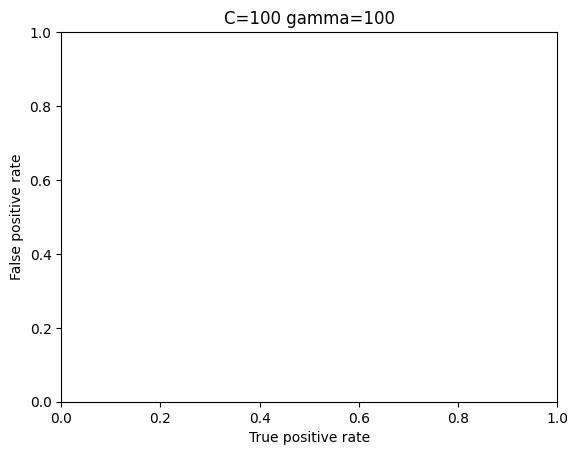

In [62]:
Cvalue=100
GAMMAvalue=0.1
plt.title('C='+str(Cvalue)+' gamma='+ str(Cvalue))
plt.xlabel('True positive rate')
plt.ylabel('False positive rate')

# creating the list of points
truepos=[[] for _ in range(5)]
falsepos=[[] for _ in range(5)]
for thresh in thresholds:
    newX, newY, svm = mlm.model(threshold=thresh, Xy=(X,y), chosen_kernel='rbf', chosen_C=Cvalue, chosen_gamma=GAMMAvalue)
    cv=mt.Cross_validate(svm, newX, newY, k=5)
    for i in [0,2,3,4,5]:
        j=0
        if i>0:
            j=i-1
        truepos[j].append(cv[i]['TP rate']/(cv[i]['TP rate']+cv[i]['FN rate']))
        falsepos[j].append(cv[i]['FP rate']/(cv[i]['TN rate']+cv[i]['FP rate']))



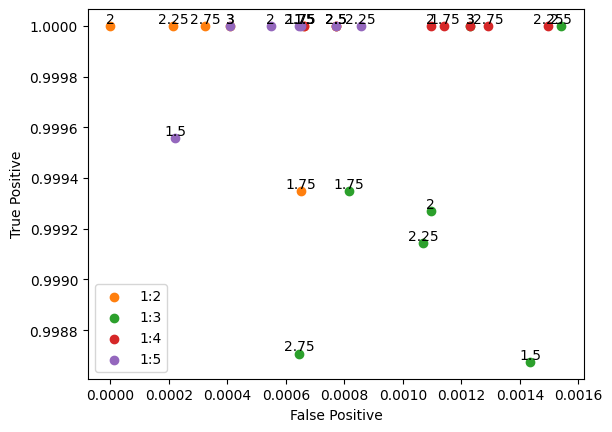

In [233]:
for j in range(5):
    plt.scatter(falsepos[j], truepos[j], label=labels[j])
    for (xi, yi, ti) in zip(falsepos[j], truepos[j], thresholds): # add labels to all points
        plt.text(xi, yi, ti, va='bottom', ha='center')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend(loc='best') 
plt.show()

## III.2. Threshold on the probabilities

In [185]:
probas=np.linspace(0.9, 0.999, 30)

In [186]:
lis=mt.ROC_probability(svm, X, y1, probas, k=5)

In [187]:
TPs=[[] for _ in range(5)]
FPs=[[] for _ in range(5)]
for dic in lis:
    for i in [0,2,3,4,5]:
        j=indice(i)
        TPs[j].append(dic[i]['TP rate']/(dic[i]['TP rate']+dic[i]['FN rate']))
        FPs[j].append(dic[i]['FP rate']/(dic[i]['FP rate']+dic[i]['TN rate']))

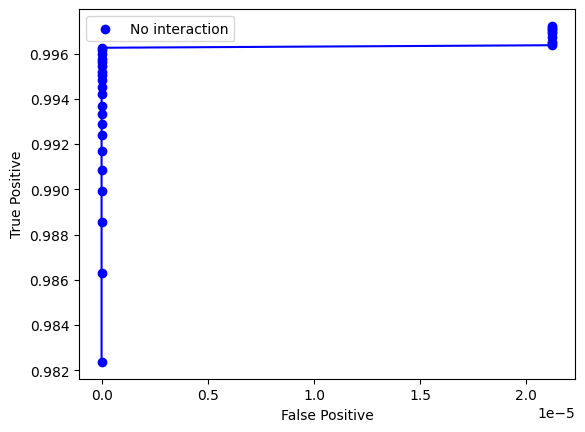

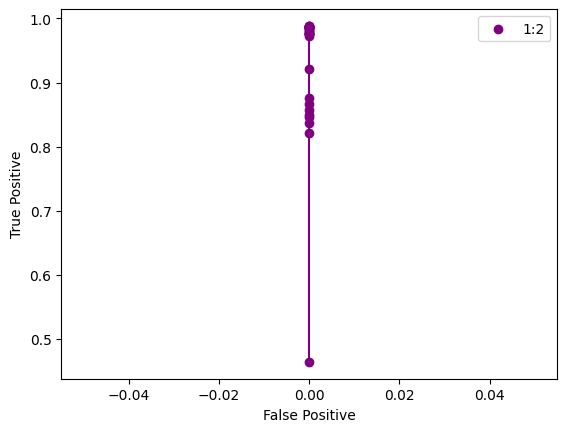

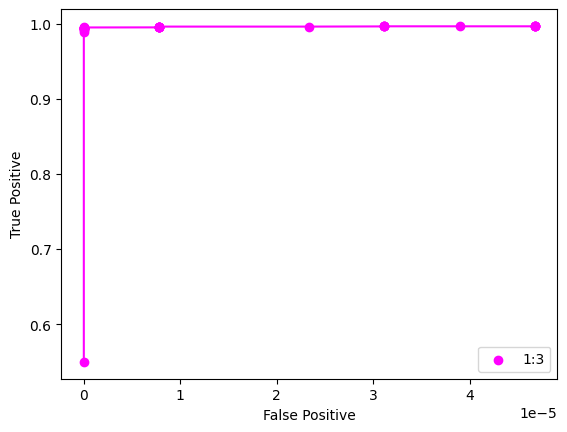

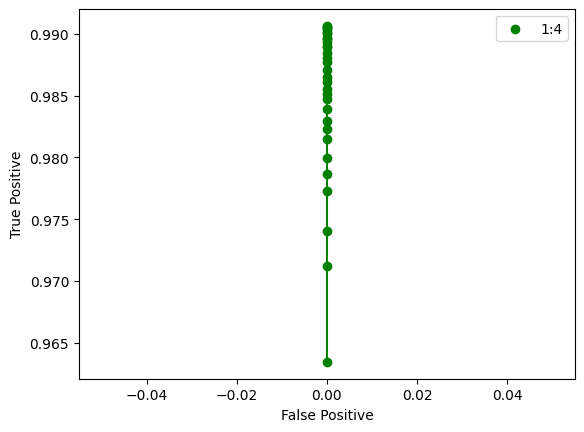

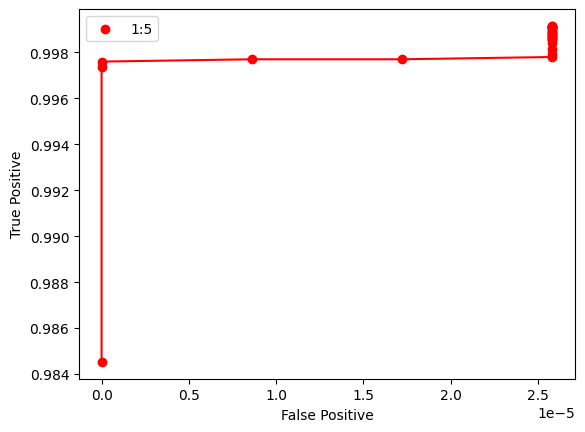

In [188]:
colors=['blue', 'purple', 'magenta', 'green', 'red']
for i in range(5):
    fig, ax = plt.subplots()
    plt.plot(FPs[i],TPs[i], color=colors[i])
    plt.scatter(FPs[i],TPs[i], label=labels[i], color=colors[i])
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.legend()
    plt.show()

# IV. Is under-sampling majority classes useful?

In [ ]:
svm = mlm.model2(threshold=2, Xy=(X,y), chosen_kernel='rbf')

In [5]:
y1=y[:,0]*(y[:,1]>2)
print(mt.Cross_validate(svm, X, y1, k=5))

{'accuracy': 0.9994728748677643, 0: {'TN rate': 0.28464393606153915, 'FN rate': 0.0002544742017689592, 'TP rate': 0.7148289388062251, 'FP rate': 0.00027265093046674205, 'precision': 0.9996187242003376, 'sensitivity': 0.9996441335414304, 'specificity': 0.9990430499910685}, 2: {'TN rate': 0.9899918931790008, 'FN rate': 7.270691479113121e-06, 'TP rate': 0.009964482672124532, 'FP rate': 3.6353457395565605e-05, 'precision': 0.9963649581970193, 'sensitivity': 0.999270871308786, 'specificity': 0.9999632803836466}, 3: {'TN rate': 0.9433140538830945, 'FN rate': 7.270691479113121e-05, 'TP rate': 0.05652599090436496, 'FP rate': 8.724829774935745e-05, 'precision': 0.9984588711230977, 'sensitivity': 0.9987153959791895, 'specificity': 0.9999075173019715}, 4: {'TN rate': 0.9263151772049281, 'FN rate': 0.00010906037218669682, 'TP rate': 0.07352123223679188, 'FP rate': 5.453018609334841e-05, 'precision': 0.9992588566628786, 'sensitivity': 0.9985188110990422, 'specificity': 0.9999411356117776}, 5: {'TN 

In [4]:
newX, newY, svm = mlm.model(threshold=2, Xy=(X,y), chosen_kernel='rbf')
print(mt.Cross_validate(svm, newX, newY, k=5))

{'accuracy': 0.9979584396646008, 0: {'TN rate': 0.8, 'FN rate': 0.002041560335399198, 'TP rate': 0.1979584396646008, 'FP rate': 0.0, 'precision': 1.0, 'sensitivity': 0.989792198323004, 'specificity': 1.0}, 2: {'TN rate': 0.7997812613926358, 'FN rate': 0.0, 'TP rate': 0.2, 'FP rate': 0.0002187386073641998, 'precision': 0.9989075018208303, 'sensitivity': 1.0, 'specificity': 0.9997265767407948}, 3: {'TN rate': 0.7994896099161501, 'FN rate': 0.0, 'TP rate': 0.2, 'FP rate': 0.0005103900838497995, 'precision': 0.9974545454545455, 'sensitivity': 1.0, 'specificity': 0.9993620123951877}, 4: {'TN rate': 0.799270871308786, 'FN rate': 0.0, 'TP rate': 0.2, 'FP rate': 0.0007291286912139992, 'precision': 0.9963675989829277, 'sensitivity': 1.0, 'specificity': 0.9990885891359825}, 5: {'TN rate': 0.7994166970470288, 'FN rate': 0.0, 'TP rate': 0.2, 'FP rate': 0.0005833029529711994, 'precision': 0.9970919665576155, 'sensitivity': 1.0, 'specificity': 0.999270871308786}}
